In [1]:
# 1. IMPORTAR LIBRERÍAS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


**1. Cargar datos y definir X, y**

In [8]:
# Cargar datos
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Variable objetivo (ajusta el nombre si es diferente)
target_col = "Quality of Sleep"

X = df.drop(columns=[target_col])
y = df[target_col]


**2. Definir columnas numéricas / categóricas y preprocesador**

In [9]:
numeric_features = [
    "Age",
    "Sleep Duration",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps"
]

categorical_features = [
    "Gender",
    "Occupation",
    "BMI Category",
    "Sleep Disorder"
]

drop_features = [
    "Person ID",
    "Blood Pressure"   # es texto "126/83", lo dejamos por fuera
]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("drop", "drop", drop_features)
    ],
    remainder="drop"
)


**3. Train / test split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**4. Pipeline con Logistic Regression**

In [12]:
log_reg_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        multi_class="multinomial",   # para multiclase
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])

# Entrenar
log_reg_clf.fit(X_train, y_train)

# Predicciones
y_pred = log_reg_clf.predict(X_test)

# Métricas
acc_log = accuracy_score(y_test, y_pred)
f1_log  = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy Logistic Regression: {acc_log:.4f}")
print(f"F1-weighted Logistic Regression: {f1_log:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))


Accuracy Logistic Regression: 0.9600
F1-weighted Logistic Regression: 0.9472

Classification report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.91      1.00      0.95        21
           7       1.00      0.94      0.97        16
           8       0.96      1.00      0.98        22
           9       1.00      1.00      1.00        14

    accuracy                           0.96        75
   macro avg       0.64      0.66      0.65        75
weighted avg       0.94      0.96      0.95        75



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Matriz de confusión**

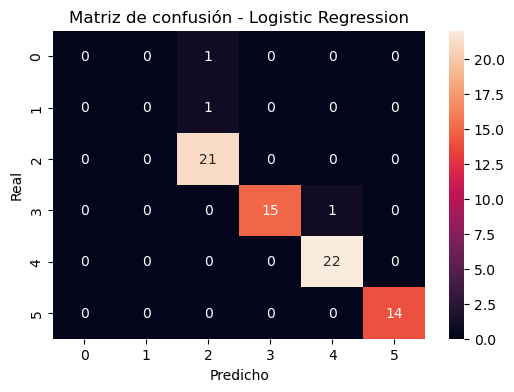

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión - Logistic Regression")
plt.show()
